In [83]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics

In [84]:
data=pd.read_csv(r"Cars_Dataset_Cleaned.csv")

In [85]:
data.describe()

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Cleaned Capacity
count,1218.000000,1218.000000,1212.000000,1.217000e+03,1218.000000,1217.000000,1213.000000
mean,307.422824,216.467159,7.564686,1.380370e+05,4.851396,506.892358,2703.311689
std,222.722922,53.051077,3.312010,7.110424e+05,1.514407,1049.512321,1942.861991
min,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000,1.240000
25%,153.250000,180.000000,5.275000,2.800000e+04,4.000000,250.000000,1500.000000
50%,255.000000,200.000000,7.100000,4.250000e+04,5.000000,370.000000,2000.000000
75%,400.000000,250.000000,9.500000,7.000000e+04,5.000000,560.000000,3500.000000
max,2488.000000,500.000000,35.000000,1.800000e+07,20.000000,15590.000000,16100.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1215 non-null   object 
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1212 non-null   float64
 7   Cars Prices                1217 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   float64
 10  Torque                     1217 non-null   float64
 11  Cleaned Capacity           1213 non-null   float64
dtypes: float64(7), object(5)
memory usage: 114.3+ KB


In [87]:
data.dtypes

Company Names                 object
Cars Names                    object
Engines                       object
CC/Battery Capacity           object
HorsePower                   float64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                  float64
Fuel Types                    object
Seats                        float64
Torque                       float64
Cleaned Capacity             float64
dtype: object

In [88]:
data.sample(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
276,Volkswagen,Arteon,2.0L Turbo I4,1984 cc,215.0,250.0,5.6,46000.0,Petrol,5.0,350.0,1984.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,182.5,190.0,8.6,27172.5,Gas / Hybrid,5.0,200.0,1987.0
23,NISSAN,370Z,V6,"3,696 cc",332.0,250.0,4.7,30000.0,Petrol,2.0,366.0,3696.0
13,FERRARI,MONZA SP2,V12,"6,496 cc",789.0,340.0,2.9,1700000.0,Petrol,2.0,719.0,6496.0
415,Nissan,Terrano XL,1.6L Inline-4,1598 cc,104.0,165.0,12.5,14000.0,Petrol,5.0,145.0,1598.0
333,Volkswagen,Beetle Dune,1.4L I4 Turbo,1395 cc,150.0,200.0,7.5,30000.0,Petrol,4.0,250.0,1395.0
927,Jaguar Land Rover,Jaguar F-PACE S AWD,I4 Petrol / V6 Petrol,1999 cc (I4) / 2995 cc (V6),340.0,250.0,5.4,65000.0,Petrol,5.0,480.0,1251.0
1142,Mazda,Tribute,3.0L V6,"3,000 cc",200.0,190.0,9.0,27000.0,Petrol,5.0,270.0,3000.0
357,Volkswagen,Golf TGI,1.5L I4 CNG,1498 cc,130.0,220.0,8.8,30000.0,Petrol,5.0,200.0,1498.0
482,Nissan,Stanza Wagon,2.4L Inline-4,2389 cc,138.0,160.0,12.0,22000.0,Petrol,7.0,205.0,2389.0


# cleaning CC/Battery Capacity for ML Modeles

In [89]:
data=data.drop(["CC/Battery Capacity"] , axis=1)


In [90]:
data.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  1
Fuel Types                   0
Seats                        0
Torque                       1
Cleaned Capacity             5
dtype: int64

In [91]:
data["Cleaned Capacity"].fillna(data["Cleaned Capacity"].mean() , inplace=True)
data["Torque"].fillna(data["Torque"].mean() , inplace=True)
data["Cars Prices"].fillna(data["Cars Prices"].mean() , inplace=True)
data["Performance(0 - 100 )KM/H"].fillna(data["Performance(0 - 100 )KM/H"].mean() , inplace=True)

D:\Temp\ipykernel_9656\1800739034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cleaned Capacity"].fillna(data["Cleaned Capacity"].mean() , inplace=True)
D:\Temp\ipykernel_9656\1800739034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

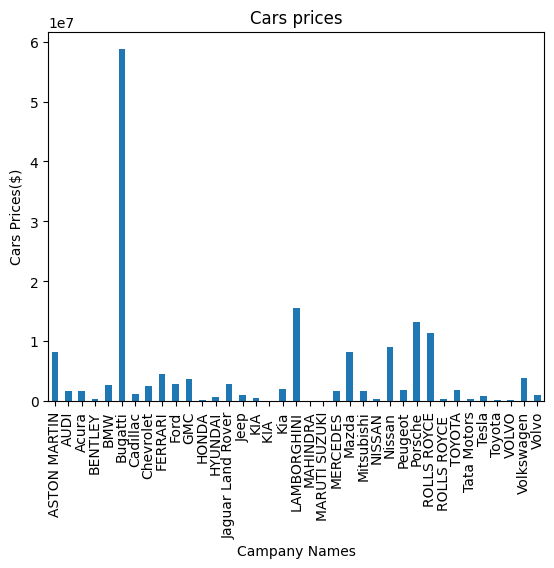

In [92]:
category_sales = data.groupby('Company Names')['Cars Prices'].sum()
category_sales.plot(kind='bar')
plt.title('Cars prices')
plt.xlabel('Campany Names')
plt.ylabel('Cars Prices($)')
plt.show()

##Data Processing For ML

In [93]:

data = pd.get_dummies(data, columns=["Company Names", "Cars Names", "Engines", "Fuel Types"], dtype=int)




In [94]:
data.isna

<bound method DataFrame.isna of       HorsePower  Total Speed  Performance(0 - 100 )KM/H  Cars Prices  Seats  \
0          963.0        340.0                       2.50    1100000.0    2.0   
1          563.0        250.0                       5.30     460000.0    5.0   
2           77.5        165.0                      10.50      13500.0    5.0   
3          630.0        250.0                       3.20     161000.0    4.0   
4          602.0        320.0                       3.60     253290.0    2.0   
...          ...          ...                        ...          ...    ...   
1213       240.0        180.0                       7.60      45795.0    5.0   
1214       326.0        180.0                       6.80      50000.0    7.0   
1215       182.5        190.0                       8.60      27172.5    5.0   
1216       169.0        180.0                       9.20      33000.0    5.0   
1217       260.5        200.0                       7.05      36000.0    5.0   

      T

In [95]:
def extract_number(value):
    try:
        return float(''.join(c for c in str(value) if c.isdigit() or c == '.'))
    except:
        return None

data["Total_Speed"] = data["Total Speed"].apply(extract_number)  
data["Performance"] = data["Performance(0 - 100 )KM/H"].apply(extract_number)


data=data.drop([ "Total Speed" , "Performance(0 - 100 )KM/H"] , axis=1)
y=data["Cars Prices"]
x=data.drop(["Cars Prices"] , axis=1)

In [96]:

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train , x_test , y_train , y_test =model_selection.train_test_split(x ,y , test_size=0.2,random_state=42 )
print(x_train.shape , y_train.shape) , x_test , y_test


modeles={"RandomForestRegressor":RandomForestRegressor() , 
         "GradientBoostingRegressor":GradientBoostingRegressor() ,
         "LinearRegression" :LinearRegression(),
         "DecisionTreeRegressor":DecisionTreeRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor()
         }

for name,x in modeles.items():
    
    x.fit(x_train,y_train)
    y_pred=x.predict(x_train)

    score=r2_score(y_train, y_pred)
    print(f"{name}  accuracy score is {score} ")

(974, 1623) (974,)
RandomForestRegressor  accuracy score is 0.9224365035888682 
GradientBoostingRegressor  accuracy score is 0.9973992819778544 
LinearRegression  accuracy score is 1.0 
DecisionTreeRegressor  accuracy score is 1.0 
KNeighborsRegressor  accuracy score is 0.4710399720317716 


In [97]:
best_model2=RandomForestRegressor()
best_model2.fit(x_train,y_train)
y_pre=best_model2.predict(x_test)
score1=r2_score(y_test , y_pre)
print(f" RandomForestRegressor accuracy score is {score1}")

 RandomForestRegressor accuracy score is 0.759430621364248


In [98]:
best_model=DecisionTreeRegressor(max_depth=10 , min_samples_split=5 , random_state=42 )
best_model.fit(x_train,y_train)
y_pre=best_model.predict(x_test)
score1=r2_score(y_test , y_pre)
print(f"DecisionTreeRegressor accuracy score is {score1}")

DecisionTreeRegressor accuracy score is 0.9173003095486195


In [99]:
best_model1=LinearRegression()
best_model1.fit(x_train,y_train)
y_pre=best_model1.predict(x_test)
score1=r2_score(y_test , y_pre)
print(f"LinearRegression accuracy score is {score1}")

LinearRegression accuracy score is 0.7560698487802864


In [100]:
from sklearn.ensemble import VotingRegressor  , VotingClassifier # based on your data
v_clf=VotingRegressor([("LinearRegression",best_model1),("DecisionTreeRegressor",best_model),("Random", best_model2) ])

v_clf.fit(x_train,y_train)

,estimators,"[('LinearRegression', ...), ('DecisionTreeRegressor', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
,criterion,'squared_error'
,splitter,'best'


In [101]:
v_clf.score(x_train , y_train)


0.9905907528564514

In [102]:
v_clf.score(x_test , y_test)

0.9069849214978095

##Now we can choose DecisionTreeRegressor to streamlit app

In [103]:
filename='car prices.sav'
pickle.dump(v_clf , open(filename , 'wb') )
pickle.dump(scaler, open('scaler.sav', 'wb'))

with open('model_columns.pkl', 'wb') as f:
    pickle.dump(data.drop("Cars Prices", axis=1).columns.tolist(), f)

